In [1]:
#this part is to load all embeddings and do the analysis
#of what types of nodes are identified wrong with the learning
#algorithms

import numpy as np
import pickle
import networkx as nx
#from utils import run_embedding_classify_f1
from prettytable import PrettyTable
emb_location = './../generated_embedding/'
graph_location = './../data/'

In [2]:
#test run for one database
#running the f1_classification to train classifier and find out the nodes 
#which are wrongly predicted with 

emb_loc = emb_location+'citeseer.edges_deepwalk.embeddings'
run_embedding_classify_f1('citeseer',emb_loc,splits_ratio=[0.1])


with open('stats_citeseer.pickle','rb') as f_emb:
    emb1_indices,emb1_predict,emb1_label,all_indices,labels = pickle.load(f_emb)
    
f_emb.close()

print(emb1_indices.shape)
print(emb1_predict.shape)
print(emb1_label.shape)
print("\n\n")

g = nx.read_edgelist(graph_location+"citeseer.edges")

table1 = PrettyTable(['Serial No.','Node no.','True Label','Predicted Label','Degree','Neighbor label','Neighbor Match'])
counter = 0
match_counter=0
for i in range(len(emb1_indices)):
    if (np.array_equal(emb1_predict[i,:],emb1_label[i,:]))== False:
        if g.degree(str(emb1_indices[i]))==1:
            counter = counter + 1
            neighbor = list(g.neighbors(str(emb1_indices[i])))
            #print(neighbor)
            #n_label_ind = np.where(all_indices==neighbor[0])
            #print(n_label_ind)
            if np.nonzero(emb1_label[i,:])==np.nonzero(labels[int(neighbor[0]),:]):
                match=True
                match_counter += 1
            else:
                match=False
            table1.add_row([counter,str(emb1_indices[i]),np.nonzero(emb1_label[i,:]),np.nonzero(emb1_predict[i,:]),g.degree(str(emb1_indices[i])),np.nonzero(labels[int(neighbor[0]),:]),match])
        
print(table1)
print(f"total matches are: {match_counter}")

./../data/
file saved
Embedding dim: 128, graph: citeseer

Run number 1:
Train ratio: 0.9
micro: 0.5885885885885885
macro: 0.4798335584661983
samples: 0.5885885885885885
weighted: 0.5958909456077889
Accuracy: 0.5885885885885885

(333,)
(333, 7)
(333, 7)



+------------+----------+---------------+-----------------+--------+----------------+----------------+
| Serial No. | Node no. |   True Label  | Predicted Label | Degree | Neighbor label | Neighbor Match |
+------------+----------+---------------+-----------------+--------+----------------+----------------+
|     1      |   2168   | (array([6]),) |  (array([4]),)  |   1    | (array([1]),)  |     False      |
|     2      |   1739   | (array([5]),) |  (array([1]),)  |   1    | (array([5]),)  |      True      |
|     3      |   1771   | (array([3]),) |  (array([5]),)  |   1    | (array([3]),)  |      True      |
|     4      |   2209   | (array([2]),) |  (array([5]),)  |   1    | (array([2]),)  |      True      |
|     5      |   3233 

In [76]:
test_loc = np.where(all_indices==int(neighbor[0]))
test_loc = int(test_loc[0])
print(test_loc)

2235


In [3]:
#to count number of wrongly classified nodes
counts = dict()
for i in range(len(emb1_indices)):
    if (np.array_equal(emb1_predict[i,:],emb1_label[i,:]))== False:
        degree = g.degree(str(emb1_indices[i]))
        counts[degree] = counts.get(degree,0)+1
        
#for total number of nodes
counts_total = dict()
for i in range(len(emb1_indices)):
    degree = g.degree(str(emb1_indices[i]))
    counts_total[degree] = counts_total.get(degree,0)+1
    
    
    
for i in sorted(counts.keys()):
    print("for degree "+str(i)+" total: "+str(counts_total[i])+" and wrong prediction: "+ str(counts[i])+"("+str(int(counts[i]/counts_total[i]*100))+"%)")

for degree 1 total: 127 and wrong prediction: 67(52%)
for degree 2 total: 92 and wrong prediction: 35(38%)
for degree 3 total: 45 and wrong prediction: 14(31%)
for degree 4 total: 30 and wrong prediction: 8(26%)
for degree 5 total: 10 and wrong prediction: 5(50%)
for degree 6 total: 5 and wrong prediction: 2(40%)
for degree 7 total: 11 and wrong prediction: 3(27%)
for degree 9 total: 3 and wrong prediction: 1(33%)
for degree 10 total: 2 and wrong prediction: 1(50%)
for degree 12 total: 2 and wrong prediction: 1(50%)


In [4]:
#writing the above code as function to take input and show the results

datasets = ['cora','blogcatalog']

def network_analysis(dataset):
    emb_loc = emb_location+dataset+'.edges_deepwalk.embeddings'
    run_embedding_classify_f1(dataset,emb_loc,splits_ratio=[0.1])

    pickle_file = 'stats_'+dataset+'.pickle'
    with open(pickle_file,'rb') as f_emb:
        emb1_indices,emb1_predict,emb1_label = pickle.load(f_emb)
    
    f_emb.close()

    print(emb1_indices.shape)
    print(emb1_predict.shape)
    print(emb1_label.shape)
    print("\n\n")

    g = nx.read_edgelist(graph_location+"citeseer.edges")
    
    #to count number of wrongly classified nodes
    counts = dict()
    for i in range(len(emb1_indices)):
        if (np.array_equal(emb1_predict[i,:],emb1_label[i,:]))== False:
            degree = g.degree(str(emb1_indices[i]))
            counts[degree] = counts.get(degree,0)+1
        
    #for total number of nodes
    counts_total = dict()
    for i in range(len(emb1_indices)):
        degree = g.degree(str(emb1_indices[i]))
        counts_total[degree] = counts_total.get(degree,0)+1
    
    print(f"Statistics for dataset: {dataset}")
    print("---------------------------------")
    
    for i in sorted(counts.keys()):
        print("for degree "+str(i)+" total: "+str(counts_total[i])+" and wrong prediction: "+ str(counts[i])+"("+str(int(counts[i]/counts_total[i]*100))+"%)")
    return None

        
for dataset in datasets:
    network_analysis(dataset)

file saved
Embedding dim: 128, graph: cora

Run number 1:
Train ratio: 0.9
micro: 0.8376383763837638
macro: 0.8230022432436838
samples: 0.8376383763837638
weighted: 0.8347950399963107
Accuracy: 0.8376383763837638

(271,)
(271, 7)
(271, 7)



Statistics for dataset: cora
---------------------------------
for degree 1 total: 96 and wrong prediction: 16(16%)
for degree 2 total: 69 and wrong prediction: 15(21%)
for degree 3 total: 41 and wrong prediction: 4(9%)
for degree 4 total: 17 and wrong prediction: 3(17%)
for degree 5 total: 15 and wrong prediction: 1(6%)
for degree 9 total: 2 and wrong prediction: 1(50%)
for degree 11 total: 1 and wrong prediction: 1(100%)
for degree 15 total: 3 and wrong prediction: 1(33%)
for degree 23 total: 1 and wrong prediction: 1(100%)
for degree 27 total: 1 and wrong prediction: 1(100%)


/home/sunil/anaconda3/envs/graph_tool/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


file saved
Embedding dim: 128, graph: blogcatalog

Run number 1:
Train ratio: 0.9
micro: 0.40735694822888285
macro: 0.2638632029510274
samples: 0.3959302325581396
weighted: 0.43920250757323276
Accuracy: 0.3168604651162791

(1032,)
(1032, 39)
(1032, 39)



Statistics for dataset: blogcatalog
---------------------------------


TypeError: '<' not supported between instances of 'DegreeView' and 'int'

In [1]:
#next part is to visualise the graph and check which nodes are not classified accurately
#graph can be divided into three sections: traning, predicted_right and predicted_wrong



/home/sunil/anaconda3/envs/graph_tool/lib/python3.6/site-packages/graph_tool/all.py:40: RuntimeWarning: Error importing draw module, proceeding nevertheless: libiconv.so.2: cannot open shared object file: No such file or directory
  warnings.warn(msg, RuntimeWarning)


CPU times: user 31.3 s, sys: 844 ms, total: 32.1 s
Wall time: 8.25 s


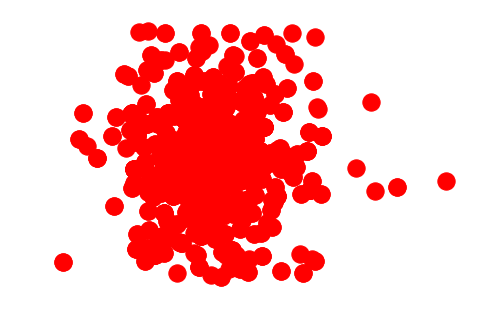

In [5]:
#this is graph_layout by networkx
%time nx.draw(g,pos=nx.spectral_layout(g))


In [6]:
#now plotting using graph_tool
import matplotlib
%matplotlib inline
from graph_tool.all import *


/home/sunil/anaconda3/envs/graph_tool/lib/python3.6/site-packages/graph_tool/draw/cairo_draw.py:1499: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


In [7]:
gt = Graph()
gt = graph_tool.load_graph_from_csv(graph_location+'citeseer.edges',csv_options={'delimiter':' '})
#graph_tool.draw.graphviz_draw(gt,pos=graph_tool.draw.(gt))

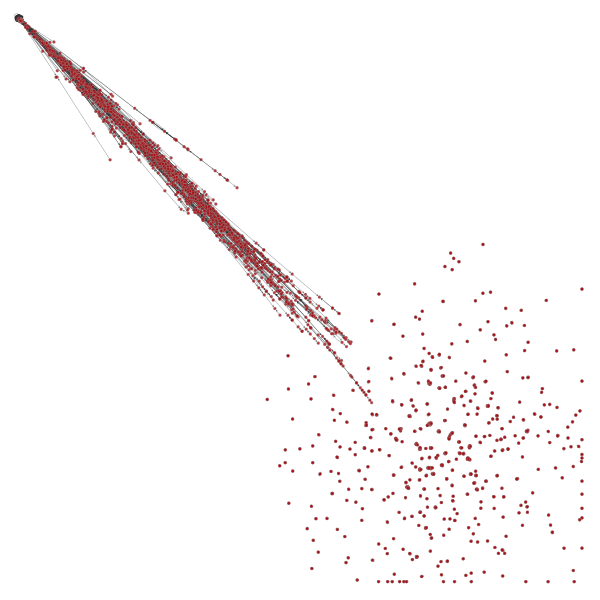

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f784a44c5f8, at 0x7f783c026a58>

In [8]:
graph_draw(gt,pos=graph_tool.draw.fruchterman_reingold_layout(gt,n_iter=100))

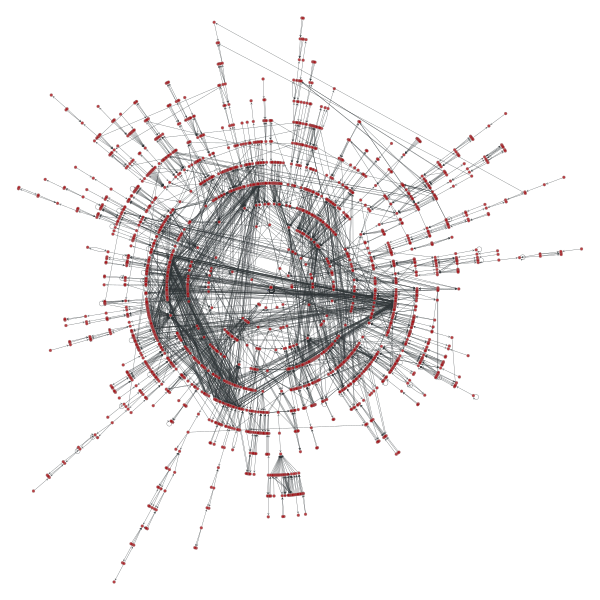

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f784a44c5f8, at 0x7f7837747518>

In [11]:
graph_draw(gt,pos=graph_tool.draw.radial_tree_layout(gt,0))

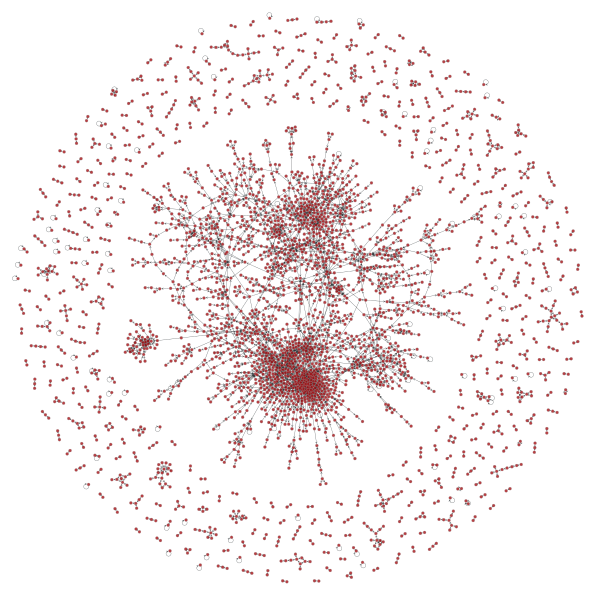

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fdfdf7860f0, at 0x7fdfdf4119e8>

In [27]:
graph_draw(gt, pos=graph_tool.draw.sfdp_layout(gt, cooling_step=0.99))

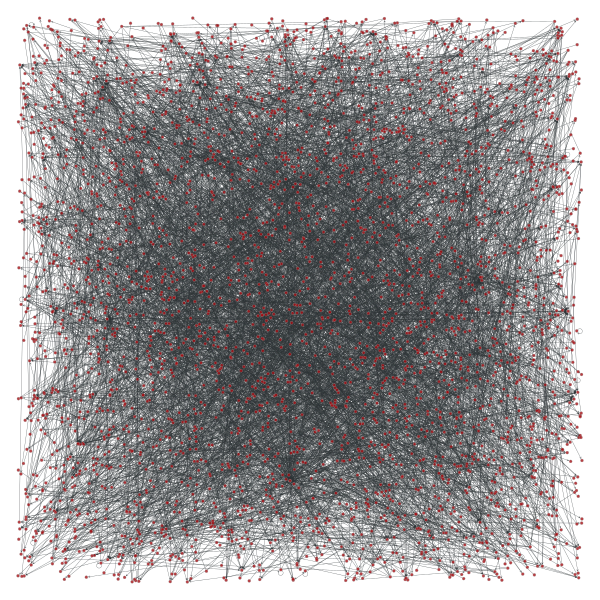

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f784a44c5f8, at 0x7f783500fac8>

In [14]:
graph_draw(gt,pos = graph_tool.draw.random_layout(gt))

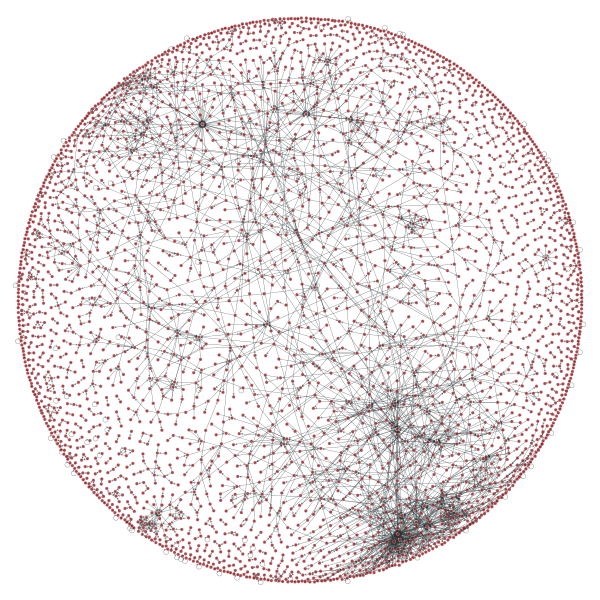

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fdfdf7860f0, at 0x7fdfdf7a9da0>

In [10]:
graph_draw(gt,pos= graph_tool.draw.arf_layout(gt, max_iter=10000))

In [47]:
#for citeseer edges
#decclaring new property for the graph based on train data and test data results.
len_gt = gt.num_vertices()
prop_arr = np.zeros(len_gt,dtype=int)
        
#prop = gt.new_vertex_property("int")


In [46]:
prop_arr.shape

(3327,)

In [48]:
for i in range(len(emb1_indices)):
    prop_arr[int(emb1_indices[i])]=2
    if (np.array_equal(emb1_predict[i,:],emb1_label[i,:]))== False:
        prop_arr[int(emb1_indices[i])]=4

In [49]:
prop = gt.new_vertex_property("int")
prop.a = prop_arr

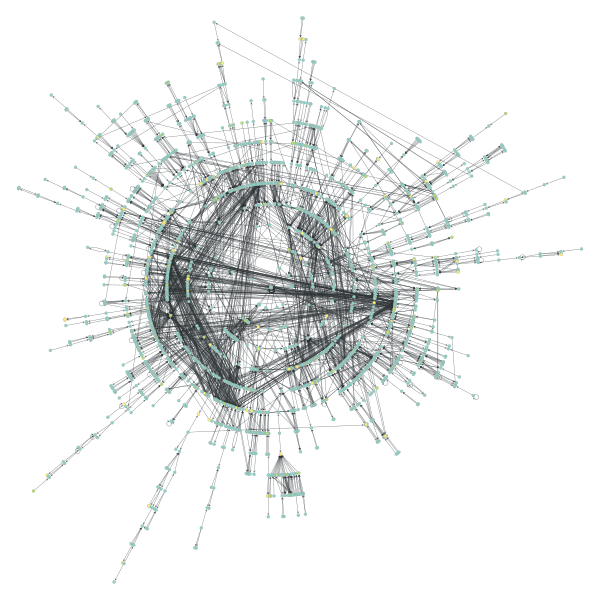

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fdfdf7860f0, at 0x7fdfacec9940>

In [59]:
#this is color labeled graph output

graph_draw(gt,pos=graph_tool.draw.radial_tree_layout(gt,0),vertex_fill_color=prop)

In [51]:
gt_cora = Graph()
gt_cora = graph_tool.load_graph_from_csv(graph_location+'cora.edges',csv_options={'delimiter':' '})

In [53]:
gt_cora.num_vertices()

2708

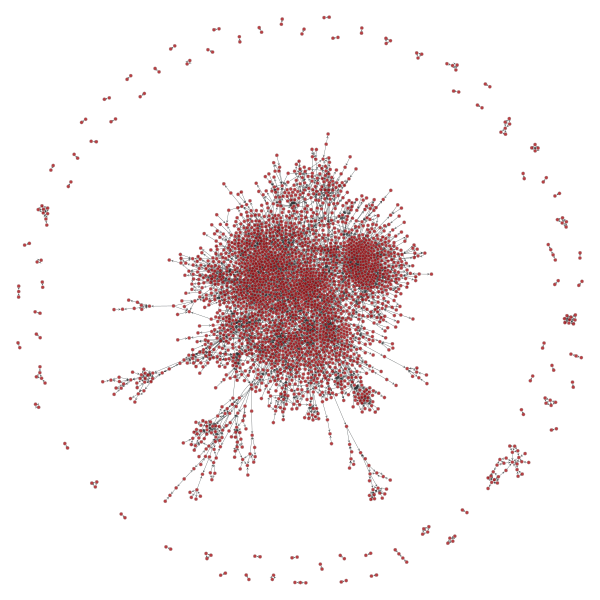

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fdfad670588, at 0x7fdfc6fcaba8>

In [54]:
graph_draw(gt_cora, pos=graph_tool.draw.sfdp_layout(gt_cora, cooling_step=0.99))

In [57]:
#above is cora graph
#now do the labels analysis on the cora graph

pickle_file = 'stats_cora.pickle'
with open(pickle_file,'rb') as f_emb:
 cora_indices,cora_predict,cora_label = pickle.load(f_emb)
    
f_emb.close()

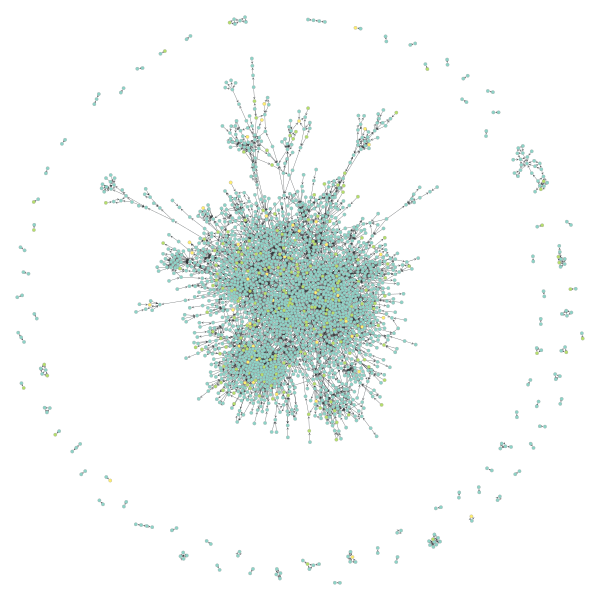

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fdfad670588, at 0x7fdface6d940>

In [61]:
len_gt = gt_cora.num_vertices()
prop_arr = np.zeros(len_gt,dtype=int)

for i in range(len(cora_indices)):
    prop_arr[int(cora_indices[i])]=2
    if (np.array_equal(cora_predict[i,:],cora_label[i,:]))== False:
        prop_arr[int(cora_indices[i])]=4
        
prop = gt_cora.new_vertex_property("int")
prop.a = prop_arr

graph_draw(gt_cora,pos=graph_tool.draw.sfdp_layout(gt_cora,cooling_step=0.99),vertex_fill_color=prop)

In [62]:
print(nx.number_connected_components(g))

438


In [63]:
g_blogcatalog = nx.read_edgelist(graph_location+'blogcatalog.edges')

In [64]:
print(nx.number_connected_components(g_blogcatalog))

1


In [2]:
#this part is to check the performance of the label propagation
#without change micro:0.588 and macro: 0.479
'''
Train ratio: 0.9
micro: 0.5885885885885885
macro: 0.4798335584661983
samples: 0.5885885885885885
weighted: 0.5958909456077889
Accuracy: 0.5885885885885885

Train ratio: 0.5
micro: 0.578125
macro: 0.45825414108134027
samples: 0.578125
weighted: 0.5880166642339891
Accuracy: 0.578125

Train ratio: 0.09999999999999998
micro: 0.5235392320534223
macro: 0.4067167368031995
samples: 0.5235392320534223
weighted: 0.5336996057006774
Accuracy: 0.5235392320534223

'''
from utils1 import run_embedding_classify_f1
emb_loc1 = emb_location+'citeseer.edges_deepwalk.embeddings'
run_embedding_classify_f1('citeseer',emb_loc1,splits_ratio=[0.1, 0.5, 0.9])

./../data/


/home/sunil/anaconda3/envs/graph_tool/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Embedding dim: 128, graph: citeseer

Run number 1:
Train ratio: 0.9
micro: 0.6846846846846847
macro: 0.5586478487942838
samples: 0.6846846846846847
weighted: 0.6898651565190875
Accuracy: 0.6846846846846847
Train ratio: 0.5
micro: 0.6340144230769231
macro: 0.5112061202798494
samples: 0.6340144230769231
weighted: 0.6430705885332537
Accuracy: 0.6340144230769231
Train ratio: 0.09999999999999998
micro: 0.528881469115192
macro: 0.41262012642553975
samples: 0.528881469115192
weighted: 0.5385366537079486
Accuracy: 0.528881469115192



/home/sunil/anaconda3/envs/graph_tool/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/sunil/anaconda3/envs/graph_tool/lib/python3.6/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/home/sunil/anaconda3/envs/graph_tool/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [4]:
#for cora modified
#without change micro:0.837 and macro:0.823
'''
micro: 0.8376383763837638
macro: 0.8230022432436838
samples: 0.8376383763837638
weighted: 0.8347950399963107
Accuracy: 0.8376383763837638

Train ratio: 0.5
micro: 0.8227474150664698
macro: 0.8139173909812235
samples: 0.8227474150664698
weighted: 0.8231682225619357
Accuracy: 0.8227474150664698

Train ratio: 0.09999999999999998
micro: 0.7522559474979491
macro: 0.7319415816065037
samples: 0.7522559474979491
weighted: 0.754350324344212
Accuracy: 0.7522559474979491
'''
emb_loc = emb_location+'cora.edges_deepwalk.embeddings'
run_embedding_classify_f1('cora',emb_loc,splits_ratio=[0.1, 0.5, 0.9])

Embedding dim: 128, graph: cora

Run number 1:
Train ratio: 0.9
micro: 0.8560885608856088
macro: 0.8347367321394286
samples: 0.8560885608856088
weighted: 0.8542303859473288
Accuracy: 0.8560885608856088
Train ratio: 0.5
micro: 0.8367799113737076
macro: 0.8274962803835691
samples: 0.8367799113737076
weighted: 0.8371479866369408
Accuracy: 0.8367799113737076
Train ratio: 0.09999999999999998
micro: 0.7522559474979491
macro: 0.7319415816065037
samples: 0.7522559474979491
weighted: 0.754350324344212
Accuracy: 0.7522559474979491



In [2]:
#for blogcatalog
'''
micro: 0.40735694822888285
macro: 0.2638632029510274
samples: 0.3959302325581396
weighted: 0.43920250757323276
Accuracy: 0.3168604651162791

'''
from utils1 import run_embedding_classify_f1
emb_loc = emb_location+'blogcatalog.edges_deepwalk.embeddings'
run_embedding_classify_f1('blogcatalog',emb_loc,splits_ratio=[0.1])

Embedding dim: 128, graph: blogcatalog

Run number 1:
Train ratio: 0.9
micro: 0.40760869565217384
macro: 0.26803019337048195
samples: 0.39689922480620154
weighted: 0.4378760533911443
Accuracy: 0.31589147286821706



/home/sunil/anaconda3/envs/graph_tool/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [3]:
#checking for pubmed with normal deepwalk

from utils import run_embedding_classify_f1
emb_loc = emb_location+'pubmed.edges_deepwalk.embeddings'
run_embedding_classify_f1('pubmed',emb_loc,splits_ratio=[0.1])

file saved
Embedding dim: 128, graph: pubmed

Run number 1:
Train ratio: 0.9
micro: 0.8057809330628803
macro: 0.7963475542078481
samples: 0.8057809330628803
weighted: 0.8066786564389099
Accuracy: 0.8057809330628803



In [10]:
def network_analysis(dataset):
    emb_loc = emb_location+dataset+'.edges_deepwalk.embeddings'
    run_embedding_classify_f1(dataset,emb_loc,splits_ratio=[0.1])

    pickle_file = 'stats_'+dataset+'.pickle'
    with open(pickle_file,'rb') as f_emb:
        emb1_indices,emb1_predict,emb1_label,indices,labels = pickle.load(f_emb)
    
    f_emb.close()

    print(emb1_indices.shape)
    print(emb1_predict.shape)
    print(emb1_label.shape)
    print("\n\n")

    g = nx.read_edgelist(graph_location+"pubmed.edges")
    
    #to count number of wrongly classified nodes
    counts = dict()
    print(counts)
    for i in range(len(emb1_indices)):
        if (np.array_equal(emb1_predict[i,:],emb1_label[i,:]))== False:
            degree = g.degree(str(emb1_indices[i]))
            counts[degree] = counts.get(degree,0)+1
        
    #for total number of nodes
    counts_total = dict()
    for i in range(len(emb1_indices)):
        degree = g.degree(str(emb1_indices[i]))
        counts_total[degree] = counts_total.get(degree,0)+1
    
    print(f"Statistics for dataset: {dataset}")
    print("---------------------------------")
  
    for i in sorted(counts.keys()):
        #print("going to loop")
        print("for degree "+str(i)+" total: "+str(counts_total[i])+" and wrong prediction: "+ str(counts[i])+"("+str(int(counts[i]/counts_total[i]*100))+"%)")
    return None

        

network_analysis("pubmed")

file saved
Embedding dim: 128, graph: pubmed

Run number 1:
Train ratio: 0.9
micro: 0.8057809330628803
macro: 0.7963475542078481
samples: 0.8057809330628803
weighted: 0.8066786564389099
Accuracy: 0.8057809330628803

(1972,)
(1972, 3)
(1972, 3)



{}
Statistics for dataset: pubmed
---------------------------------
for degree 1 total: 914 and wrong prediction: 230(25%)
for degree 2 total: 324 and wrong prediction: 55(16%)
for degree 3 total: 170 and wrong prediction: 21(12%)
for degree 4 total: 79 and wrong prediction: 10(12%)
for degree 5 total: 62 and wrong prediction: 5(8%)
for degree 6 total: 38 and wrong prediction: 3(7%)
for degree 7 total: 50 and wrong prediction: 4(8%)
for degree 8 total: 33 and wrong prediction: 5(15%)
for degree 9 total: 16 and wrong prediction: 5(31%)
for degree 11 total: 22 and wrong prediction: 4(18%)
for degree 12 total: 26 and wrong prediction: 2(7%)
for degree 13 total: 19 and wrong prediction: 3(15%)
for degree 14 total: 19 and wrong prediction: 4(21%)
f

In [2]:
#checking the case with util1.py
#for pubmed

from utils1 import run_embedding_classify_f1
emb_loc = emb_location+'pubmed.edges_deepwalk.embeddings'
run_embedding_classify_f1('pubmed',emb_loc,splits_ratio=[0.1])

Embedding dim: 128, graph: pubmed

Run number 1:
Train ratio: 0.9
micro: 0.8002028397565923
macro: 0.7934672083284777
samples: 0.8002028397565923
weighted: 0.8009052754347735
Accuracy: 0.8002028397565923



In [5]:
#test run for one database
#running the f1_classification to train classifier and find out the nodes 
#which are wrongly predicted with 

from utils import run_embedding_classify_f1
emb_loc = emb_location+'pubmed.edges_deepwalk.embeddings'
run_embedding_classify_f1('pubmed',emb_loc,splits_ratio=[0.1])


with open('stats_pubmed.pickle','rb') as f_emb:
    emb1_indices,emb1_predict,emb1_label,all_indices,labels = pickle.load(f_emb)
    
f_emb.close()

print(emb1_indices.shape)
print(emb1_predict.shape)
print(emb1_label.shape)
print("\n\n")

g = nx.read_edgelist(graph_location+"pubmed.edges")

table1 = PrettyTable(['Serial No.','Node no.','True Label','Predicted Label','Degree','Neighbor label','Neighbor Match'])
counter = 0
match_counter=0
for i in range(len(emb1_indices)):
    if (np.array_equal(emb1_predict[i,:],emb1_label[i,:]))== False:
        if g.degree(str(emb1_indices[i]))==1:
            counter = counter + 1
            neighbor = list(g.neighbors(str(emb1_indices[i])))
            #print(neighbor)
            #n_label_ind = np.where(all_indices==neighbor[0])
            #print(n_label_ind)
            if np.nonzero(emb1_label[i,:])==np.nonzero(labels[int(neighbor[0]),:]):
                match=True
                match_counter += 1
            else:
                match=False
            table1.add_row([counter,str(emb1_indices[i]),np.nonzero(emb1_label[i,:]),np.nonzero(emb1_predict[i,:]),g.degree(str(emb1_indices[i])),np.nonzero(labels[int(neighbor[0]),:]),match])
        
print(table1)
print(f"total matches are: {match_counter}")

file saved
Embedding dim: 128, graph: pubmed

Run number 1:
Train ratio: 0.9
micro: 0.8057809330628803
macro: 0.7963475542078481
samples: 0.8057809330628803
weighted: 0.8066786564389099
Accuracy: 0.8057809330628803

(1972,)
(1972, 3)
(1972, 3)



+------------+----------+---------------+-----------------+--------+----------------+----------------+
| Serial No. | Node no. |   True Label  | Predicted Label | Degree | Neighbor label | Neighbor Match |
+------------+----------+---------------+-----------------+--------+----------------+----------------+
|     1      |  10833   | (array([2]),) |  (array([0]),)  |   1    | (array([0]),)  |     False      |
|     2      |  12289   | (array([2]),) |  (array([1]),)  |   1    | (array([1]),)  |     False      |
|     3      |  19682   | (array([2]),) |  (array([1]),)  |   1    | (array([1]),)  |     False      |
|     4      |   9233   | (array([1]),) |  (array([0]),)  |   1    | (array([1]),)  |      True      |
|     5      |   3382   | (array

/home/sunil/anaconda3/envs/graph_tool/lib/python3.6/site-packages/graph_tool/draw/cairo_draw.py:1499: RuntimeWarning: Error importing Gtk module: No module named 'gi'; GTK+ drawing will not work.
  warnings.warn(msg, RuntimeWarning)


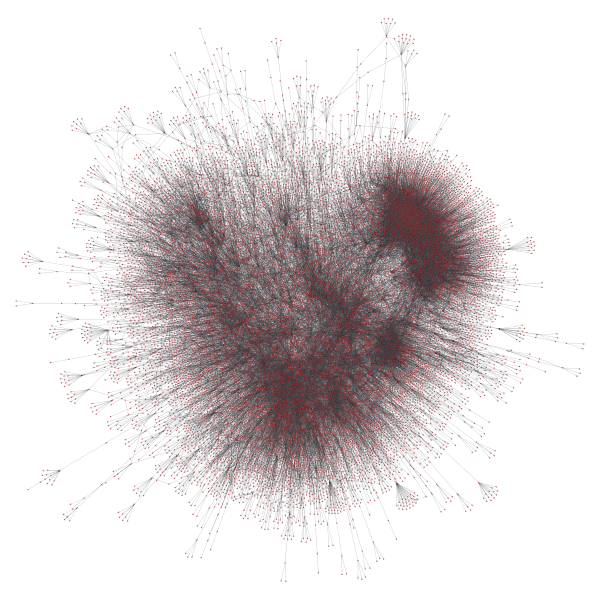

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f6d7c073128, at 0x7f6d85d12cc0>

In [6]:
#now plotting using graph_tool
import matplotlib
%matplotlib inline
from graph_tool.all import *

gt_pubmed = Graph()
gt_pubmed = graph_tool.load_graph_from_csv(graph_location+'pubmed.edges',csv_options={'delimiter':' '})

graph_draw(gt_pubmed, pos=graph_tool.draw.sfdp_layout(gt_pubmed, cooling_step=0.99))

In [2]:
#analysis on reddit embeddings
import json
reddit_loc = './../../../datasets/reddit/'

dir()

['In',
 'Out',
 'PrettyTable',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'emb_location',
 'exit',
 'get_ipython',
 'graph_location',
 'json',
 'np',
 'nx',
 'pickle',
 'quit',
 'reddit_loc']

In [2]:
from utils import run_embedding_classify_f1
emb_loc = emb_location+'reddit.edges_deepwalk.embeddings'
run_embedding_classify_f1('reddit',emb_loc,splits_ratio=[0.1])

file saved
Embedding dim: 128, graph: reddit

Run number 1:
Train ratio: 0.9
micro: 0.8975404558526849
macro: 0.8701530715543039
samples: 0.8975404558526849
weighted: 0.8904164275589822
Accuracy: 0.8975404558526849



In [4]:
g = nx.read_edgelist(emb_location+'reddit.edges')
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 231443\nNumber of edges: 11606919\nAverage degree: 100.3005'

In [2]:
from utils1 import run_embedding_classify_f1
emb_loc = emb_location+'reddit.edges_deepwalk.embeddings'
run_embedding_classify_f1('reddit',emb_loc,splits_ratio=[0.1])

Embedding dimensions are:
(232965, 128)
<class 'numpy.ndarray'>
Embedding dim: 128, graph: reddit

Run number 1:
Train ratio: 0.9
micro: 0.8878396360046358
macro: 0.8607415115536458
samples: 0.8878396360046358
weighted: 0.8808358318291659
Accuracy: 0.8878396360046358



In [2]:
from utils_umap import run_embedding_classify_f1
#emb_loc = emb_location+'planetoid_citeseer.embed'
with open(emb_location+"trans.model.0","rb") as f:
    temp = pickle.load(f,encoding='latin1')
emb_loc = temp[0]
run_embedding_classify_f1('citeseer',emb_loc,splits_ratio=[0.1])

./../data/
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
file saved
Embedding dim: 50, graph: citeseer

Run number 1:
Train ratio: 0.9
micro: 0.21621621621621623
macro: 0.14070091754063432
samples: 0.21621621621621623
weighted: 0.2408786502665458
Accuracy: 0.21621621621621623



/home/sunil/anaconda3/envs/env1/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
